# Modes coupling distributions

Imports

In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import mmfsim.grid as grids
import mmfsim.beams as beams
from mmfsim.fiber import GrinFiber
from mmfsim.coupling import GrinFiberCoupler, GrinFiberDegenCoupler
from mmfsim.devices import MockDeformableMirror

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Modes coupling distributions

In [60]:
fiber = GrinFiber()
degen = False

phase_dims = [(6,6), (12,12), (18, 18)]

n_avg = 1000
if degen:
    coeffs_intens = np.zeros(shape=(fiber._N_modes_degen, len(phase_dims), n_avg))
else:
    coeffs_intens = np.zeros(shape=(fiber._N_modes, len(phase_dims), n_avg))

for j in range(len(phase_dims)):
    print(f"{j+1}/{len(phase_dims)}")
    for i in range(n_avg):
        phase_map = 2*np.pi*np.random.rand(*phase_dims[j])

        dm = MockDeformableMirror(pixel_size=100e-6, pixel_numbers=(128,128))
        dm.apply_phase_map(phase_map)
        dm_grid = grids.Grid(pixel_size=dm.pixel_size, pixel_numbers=dm.pixel_numbers)
        beam = beams.GaussianBeam(dm_grid)
        beam.compute(amplitude=1, width=5100e-6, centers=[0,0])
        dm.apply_amplitude_map(beam.amplitude)
        dm.reduce_by(200)

        beam.grid.reduce_by(200)
        beam.field = dm._field_matrix 
        beam.normalize_by_energy()
        if degen:
            coupled_in = GrinFiberDegenCoupler(beam.field, beam.grid, fiber, N_modes=fiber._N_modes_degen)
        else:
            coupled_in = GrinFiberCoupler(beam.field, beam.grid, fiber, N_modes=fiber._N_modes)
        
        coeffs_intens[:, j, i] = coupled_in.coeffs_intensity
        print(f"{i+1}/{n_avg}")


1/3
1/1000
2/1000
3/1000
4/1000
5/1000
6/1000
7/1000
8/1000
9/1000
10/1000
11/1000
12/1000
13/1000
14/1000
15/1000
16/1000
17/1000
18/1000
19/1000
20/1000
21/1000
22/1000
23/1000
24/1000
25/1000
26/1000
27/1000
28/1000
29/1000
30/1000
31/1000
32/1000
33/1000
34/1000
35/1000
36/1000
37/1000
38/1000
39/1000
40/1000
41/1000
42/1000
43/1000
44/1000
45/1000
46/1000
47/1000
48/1000
49/1000
50/1000
51/1000
52/1000
53/1000
54/1000
55/1000
56/1000
57/1000
58/1000
59/1000
60/1000
61/1000
62/1000
63/1000
64/1000
65/1000
66/1000
67/1000
68/1000
69/1000
70/1000
71/1000
72/1000
73/1000
74/1000
75/1000
76/1000
77/1000
78/1000
79/1000
80/1000
81/1000
82/1000
83/1000
84/1000
85/1000
86/1000
87/1000
88/1000
89/1000
90/1000
91/1000
92/1000
93/1000
94/1000
95/1000
96/1000
97/1000
98/1000
99/1000
100/1000
101/1000
102/1000
103/1000
104/1000
105/1000
106/1000
107/1000
108/1000
109/1000
110/1000
111/1000
112/1000
113/1000
114/1000
115/1000
116/1000
117/1000
118/1000
119/1000
120/1000
121/1000
122/1000
123/10

Plot coupled modes energy distributions

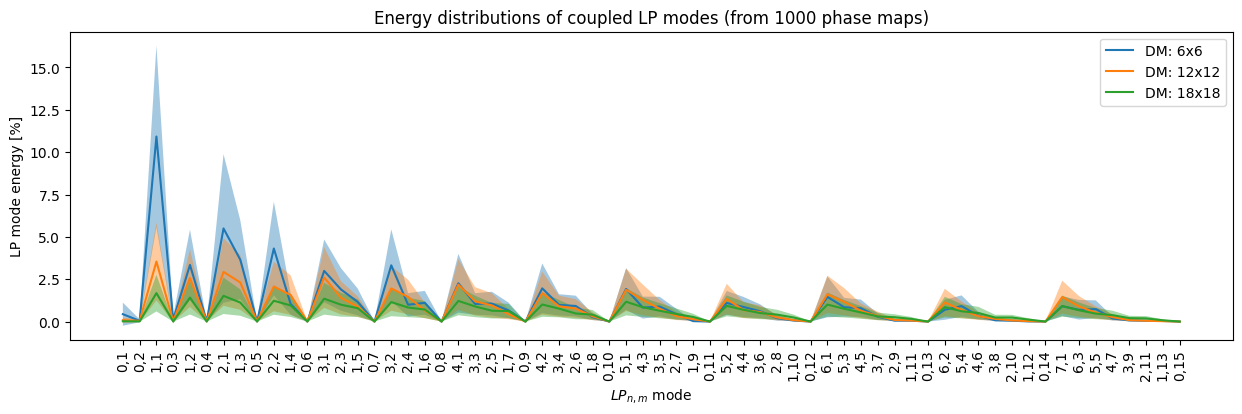

In [65]:
nm = coupled_in.fiber._neff_hnm[:coupled_in.N_modes, 2:].astype(int)
nm_strings = [f"{nm[i,0]:d},{nm[i,1]:d}" for i in range(nm.shape[0])]

x = np.arange(0, coeffs_intens.shape[0], 1)
y_mean = np.mean(coeffs_intens, axis=2) * 100
y_std = np.std(coeffs_intens, axis=2) * 100

fig, axs = plt.subplots(1, 1, figsize=(15,4))
axs.set_ylabel("LP mode energy [%]")
axs.set_xlabel(r"$LP_{n,m}$ mode")
axs.set_title(f"Energy distributions of coupled LP modes (from {n_avg} phase maps)")
axs.set_xticks(x, nm_strings, rotation='vertical')

for j in range(len(phase_dims)):
    axs.plot(x, y_mean[:,j], label=(f"DM: {phase_dims[j][0]}x{phase_dims[j][1]}"))
    axs.fill_between(x, y_mean[:,j] + y_std[:,j], y_mean[:,j] - y_std[:,j], alpha=0.4)

plt.legend()

plt.savefig('avg_dists.svg')

Plot coupled modes normalized (by the maximum) energy distributions

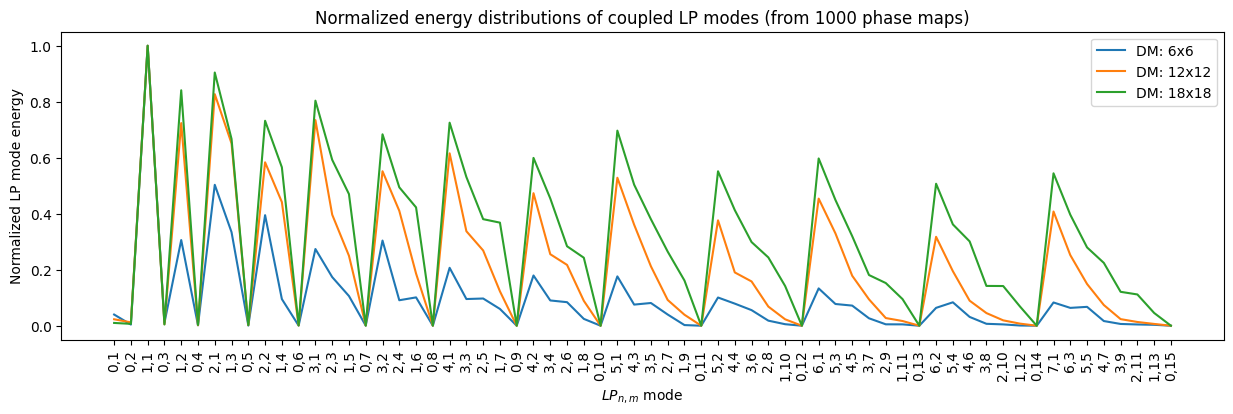

In [67]:
y_mean_norm = y_mean / np.max(y_mean, axis=0)
y_std_norm = y_std / np.max(y_std, axis=0)

fig, axs = plt.subplots(1, 1, figsize=(15,4))
axs.set_ylabel("Normalized LP mode energy")
axs.set_xlabel(r"$LP_{n,m}$ mode")
axs.set_title(f"Normalized energy distributions of coupled LP modes (from {n_avg} phase maps)")
axs.set_xticks(x, nm_strings, rotation='vertical')

for j in range(len(phase_dims)):
    axs.plot(x, y_mean_norm[:,j], label=(f"DM: {phase_dims[j][0]}x{phase_dims[j][1]}"))

plt.legend()
plt.savefig('norm_avg_dists.svg')